<h1>6  &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

<h2>6.1 &nbsp; Erro absoluto e percentual</h2>

&nbsp; Esta seção tem como objetivo comparar a solução analítica e a aproximação numérica com a população estimada para 2021 pelo IBGE.

&nbsp; Os resultados obtidos pela solução analítica, pelo método de Euler, Euler modificado e RK4:

<center><b>Aproximação populacional para Rio Grande por método</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 198336.85795442 |
| Euler | 198335.71424191 |
| Euler modificado | 198335.74844755 |
|RK4 |198335.74844762 |
|RK45|  209760.60286601|

<center>Fonte: O autor</center>

&nbsp; Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Declarando o nome dos métodos, aproximações e a população estimada pelo IBGE

In [2]:
metodos = ['Analítico','LSODA','Euler','Euler modificado','RK4','RK45']

solucoes = [209761,198336.85795442, 198335.71424191, 198335.74844755, 198335.74844762, 209760.60286601]

index = [0,1,2,3,4]

solucao_IBGE = 212881

dados = [[0, 0, 0]]

&nbsp; A seguir, obtemos o erro das soluções obtidas com relação a população fornecida pelo IBGE.

In [3]:
for i in index:
    erro_hab = solucao_IBGE - solucoes[i]
    erro_perc = (erro_hab/solucao_IBGE)*100
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[metodos[i],round(erro_hab),str(round(erro_perc,2))+'%']])
                      

  Finalmente, exibimos os dados armazenados:

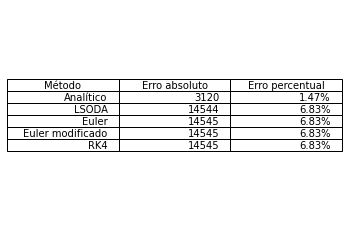

In [4]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()


<h2>6.2  &nbsp; O maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Vimos que a solução analítica possui uma aproximação aceitável, com erro de 1.47% em relação ao IBGE. &nbsp; Neste tópico, vamos verificar se é possível reduzir o passo de derivação de modo a diminuir o erro dos métodos numéricos estudados neste repositório.
<br><br>
Adicionando o diretório que contém os arquivos python:

In [5]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Importanto os módulos de <i><b>Modelo-Populacional-Malthus/python/</b></i> bem como as  bibliotecas Numpy e SciPy:

In [6]:
import numpy as np
import scipy.integrate as sciInt

from sol_euler import sol_euler
from sol_euler_mod import sol_euler_mod
from sol_rk4 import sol_rk4
from modelo import modelo

<h3>Método de Euler</h3>

&nbsp; Declarando variáveis:


In [7]:
#Condição inicial
P0 = 186488

#tempo inicial
ti = 10

#tempo final
tf = 21

#passo inicial
h = 0.001

#decrescimo
decrescimo = 0.0001 #adicionar mais um zero à esquerda faz o código demorar

#inicio de tabela de dados
dados = [[0, 0, 0, 0]]

&nbsp; Contruindo algoritmo para minimizar o erro de 14545.

In [8]:
%%time

limite = False

#excede while err>3194:
while limite==False and h>0:
    try:
        #passo
        h = h - decrescimo
        
        print('- Iteração. Passo atual (h): ',h)
        
        if (h<0):
            print('passo negativo:',h)
            h = h + decrescimo
            break
    
        #vetor tempo
        vt = np.arange(ti,tf,h)
    
        #solução
        P_euler = sol_euler(vt,P0)
    
        #erro abs
        err = solucao_IBGE - np.amax(P_euler)
    
        #erro percentual
        err_perc = (err/solucao_IBGE)*100
        
    except:
        limite = True
        print('O passo atingiu o limite')
    
 
print('Erro absoluto (hab): ',err)
print('Erro absoluto arredondado (hab): ',round(err,0))
print('Erro percentual arredondado {}%'.format(round(err_perc,2)))
print('Erro percentual arredondado {}%'.format(err_perc))
print('Passo atual: ',h)

dados = np.vstack([dados,['Euler',h,round(err),str(round(err_perc,2))+'%']])

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  14544.144290017342
Erro absoluto arredondado (hab):  14544.0
Erro percentual arredondado 6.83%
Erro percentual arredondado 6.832053724859119%
Passo atual:  9.999999999999982e-05
CPU times: total: 30.2 s
Wall time: 31.2 s


<h3>Método de Euler modificado</h3>

In [9]:
%%time

h = 0.001

limite = False

#excede while err>3194:
while limite==False and h>0:
    try:
        #passo
        h = h - decrescimo
        
        print('- Iteração. Passo atual (h): ',h)
        
        if (h<0):
            print('passo negativo:',h)
            h = h + decrescimo
            break
    
        #vetor tempo
        vt = np.arange(ti,tf,h)
    
        #solução
        P_euler_mod = sol_euler_mod(vt,P0)
    
        #erro abs
        err = solucao_IBGE - np.amax(P_euler_mod)
    
        #erro percentual
        err_perc = (err/solucao_IBGE)*100
        
    except:
        limite = True
        print('O passo atingiu o limite')
    
 
print('Erro absoluto (hab): ',err)
print('Erro absoluto arredondado (hab): ',round(err,0))
print('Erro percentual arredondado {}%'.format(round(err_perc,2)))
print('Erro percentual arredondado {}%'.format(err_perc))
print('Passo atual: ',h)

dados = np.vstack([dados,['Euler modificado',h,round(err),str(round(err_perc,2))+'%']])

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  14544.140869105322
Erro absoluto arredondado (hab):  14544.0
Erro percentual arredondado 6.83%
Erro percentual arredondado 6.832052117899353%
Passo atual:  9.999999999999982e-05
CPU times: total: 41 s
Wall time: 55.8 s


<h3>Método de Runge-Kutta de 4º ordem</h3>

In [10]:
%%time

h = 0.001

limite = False

#excede while err>3194:
while limite==False and h>0:
    try:
        #passo
        h = h - decrescimo
        
        print('- Iteração. Passo atual (h): ',h)
        
        if (h<0):
            print('passo negativo:',h)
            h = h + decrescimo
            break
    
        #vetor tempo
        vt = np.arange(ti,tf,h)
    
        #solução
        P_rk4 = sol_rk4(vt,P0)
    
        #erro abs
        err = solucao_IBGE - np.amax(P_rk4)
    
        #erro percentual
        err_perc = (err/solucao_IBGE)*100
        
    except:
        limite = True
        print('O passo atingiu o limite')
    
 
print('Erro absoluto (hab): ',err)
print('Erro absoluto arredondado (hab): ',round(err,0))
print('Erro percentual arredondado {}%'.format(round(err_perc,2)))
print('Erro percentual arredondado {}%'.format(err_perc))
print('Passo atual: ',h)

dados = np.vstack([dados,['Runge-Kutta 4º Ordem',h,round(err),str(round(err_perc,2))+'%']])

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  14544.140869104536
Erro absoluto arredondado (hab):  14544.0
Erro percentual arredondado 6.83%
Erro percentual arredondado 6.832052117898985%
Passo atual:  9.999999999999982e-05
CPU times: total: 42.7 s
Wall time: 54.2 s


<h3>Método LSODA</h3>

In [11]:
%%time

h = 0.001

limite = False

#excede while err>3194:
while limite==False and h>0:
    try:
        #passo
        h = h - decrescimo
        
        print('- Iteração. Passo atual (h): ',h)
        
        if (h<0):
            print('passo negativo:',h)
            h = h + decrescimo
            break
    
        #vetor tempo
        vt = np.arange(ti,tf,h)
    
        #solução
        P_lsoda = sciInt.odeint(modelo, y0=186488, t=vt, tfirst=True)
    
        #erro abs
        err = solucao_IBGE - np.amax(P_lsoda)
    
        #erro percentual
        err_perc = (err/solucao_IBGE)*100
        
    except:
        limite = True
        print('O passo atingiu o limite')
    
 
print('Erro absoluto (hab): ',err)
print('Erro absoluto arredondado (hab): ',round(err,0))
print('Erro percentual arredondado {}%'.format(round(err_perc,2)))
print('Erro percentual arredondado {}%'.format(err_perc))
print('Passo atual: ',h)

dados = np.vstack([dados,['LSODA',h,round(err),str(round(err_perc,2))+'%']])

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  14544.142110810935
Erro absoluto arredondado (hab):  14544.0
Erro percentual arredondado 6.83%
Erro percentual arredondado 6.832052701185609%
Passo atual:  9.999999999999982e-05
CPU times: total: 93.8 ms
Wall time: 101 ms


<h3> Método RK45 </h3>

In [12]:
%%time

h = 0.001

limite = False

#excede while err>3194:
while limite==False and h>0:
    try:
        #passo
        h = h - decrescimo
        
        print('- Iteração. Passo atual (h): ',h)
        
        if (h<0):
            print('passo negativo:',h)
            h = h + decrescimo
            break
    
        #vetor tempo
        vt = np.arange(ti,tf,h)
    
        #solução
        P_rk45 = sciInt.solve_ivp(modelo, t_span=(0,max(vt)), y0=[186488], t_eval=vt)
    
        #erro abs
        err = solucao_IBGE - np.amax(P_rk45.y[0])
    
        #erro percentual
        err_perc = (err/solucao_IBGE)*100
        
    except:
        limite = True
        print('O passo atingiu o limite')
    
 
print('Erro absoluto (hab): ',err)
print('Erro absoluto arredondado (hab): ',round(err,0))
print('Erro percentual arredondado {}%'.format(round(err_perc,2)))
print('Erro percentual arredondado {}%'.format(err_perc))
print('Passo atual: ',h)

dados = np.vstack([dados,['RK45',h,round(err),str(round(err_perc,2))+'%']])

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  3120.397134018305
Erro absoluto arredondado (hab):  3120.0
Erro percentual arredondado 1.47%
Erro percentual arredondado 1.4657940981197501%
Passo atual:  9.999999999999982e-05
CPU times: total: 219 ms
Wall time: 217 ms


<h3>Resultados</h3>

[['Euler' '9.999999999999982e-05' '14544' '6.83%']
 ['Euler modificado' '9.999999999999982e-05' '14544' '6.83%']
 ['Runge-Kutta 4º Ordem' '9.999999999999982e-05' '14544' '6.83%']
 ['LSODA' '9.999999999999982e-05' '14544' '6.83%']
 ['RK45' '9.999999999999982e-05' '3120' '1.47%']]


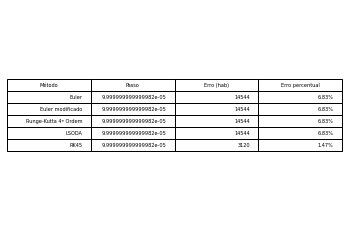

In [13]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Passo','Erro (hab)', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
print(dados)
plt.show()